In [1]:
################################################################################
# Author 1:      Daniel Schipfer 
# MatNr 1:       11723440
# Author 2:      Firstname Lastname
# MatNr 2:       01234567
# Author 3:      Firstname Lastname
# MatNr 3:       01234567
# File:          assignment2.ipynb
# Description: ... short description of the file ...
# Comments:    ... comments for the tutors ...
#              ... can be multiline ...
################################################################################

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#import plotly
import numpy as np
#import pycountry
#import pycountry_convert

In [3]:
def get_data() -> pd.DataFrame:
    """
    function to load data into a DataFrame, extract the useful colummns and name them more clearly.
    Returns:
        Data.Frame
    """
    #
    df = pd.read_csv("OECD.ELS.HD,DSD_HEALTH_LVNG@DF_HEALTH_LVNG_AC,1.0+all.csv")
    df = df[["Reference area", "TIME_PERIOD", "OBS_VALUE"]]
    df = df.rename(columns={"Reference area": "country",
                    "TIME_PERIOD": "year",
                    "OBS_VALUE": "alcohol_consumption (l/person)"
                    }
    )
    return df

In [4]:
def line_plot(country_names: list[str],
              data: pd.DataFrame = get_data(),
              year_range: tuple[int, int] = (1960, 2024)) -> None:
    """
    Creates a line plot for the specified countries and year range. 
    Default data is set and the year range is set at the min/max values (1960, 2024).
    
    Parameters:
        country_names (list[str]): List of country names to include in the plot.
        data (pd.DataFrame): DataFrame containing the data (default is previous DataFrame).
        year_range (tuple[int, int]): Start and end year for the plot (default min/max values (1960, 2024)).

    Returns:
        None: Displays the plot.
    """
    df_filtered = data[
        (data["country"].isin(country_names)) &
        (data["year"] >= year_range[0]) &
        (data["year"] <= year_range[1])
    ]
    
    df_pivot = df_filtered.pivot(
        index="year",
        columns="country",
        values="alcohol_consumption (l/person)"
    )

    df_pivot.plot(figsize=(15,8), marker="o")
    plt.title("Alcohol consumption (litre/person) over the years per country")
    plt.xlabel("Year")
    plt.ylabel("Alcohol consumption (litre/person)")
    plt.grid(alpha=.6, axis="y")
    plt.show()

    return None
  

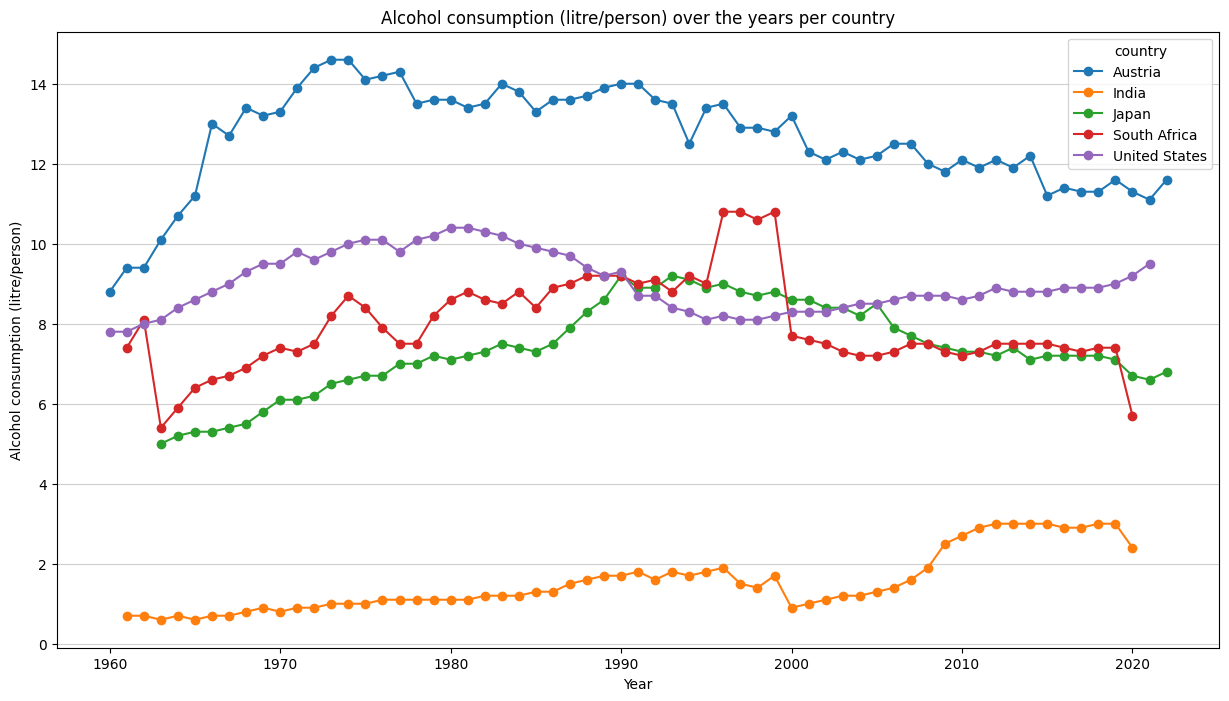

In [5]:
line_plot(["Austria", "United States", "Japan", "South Africa", "India"])